In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [ ]:
# 모델 실행 (역치 조정)
results = model(img, conf=0.25)  # confidence threshold를 0.25로 설정

# 결과 출력
results.print()
results.show()

# 객체 정보 추출 (예: bounding box 좌표, 클래스, 신뢰도)
for *xyxy, conf, cls in results.xyxy[0]:
    print(f"Bounding box: {xyxy}, Class: {cls}, Confidence: {conf}")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1440x1080 1 김치
Speed: 25.9ms pre-process, 317.6ms inference, 22.5ms NMS per image at shape (1, 3, 640, 480)


100%|██████████| 22.2M/22.2M [00:00<00:00, 26.4MB/s]


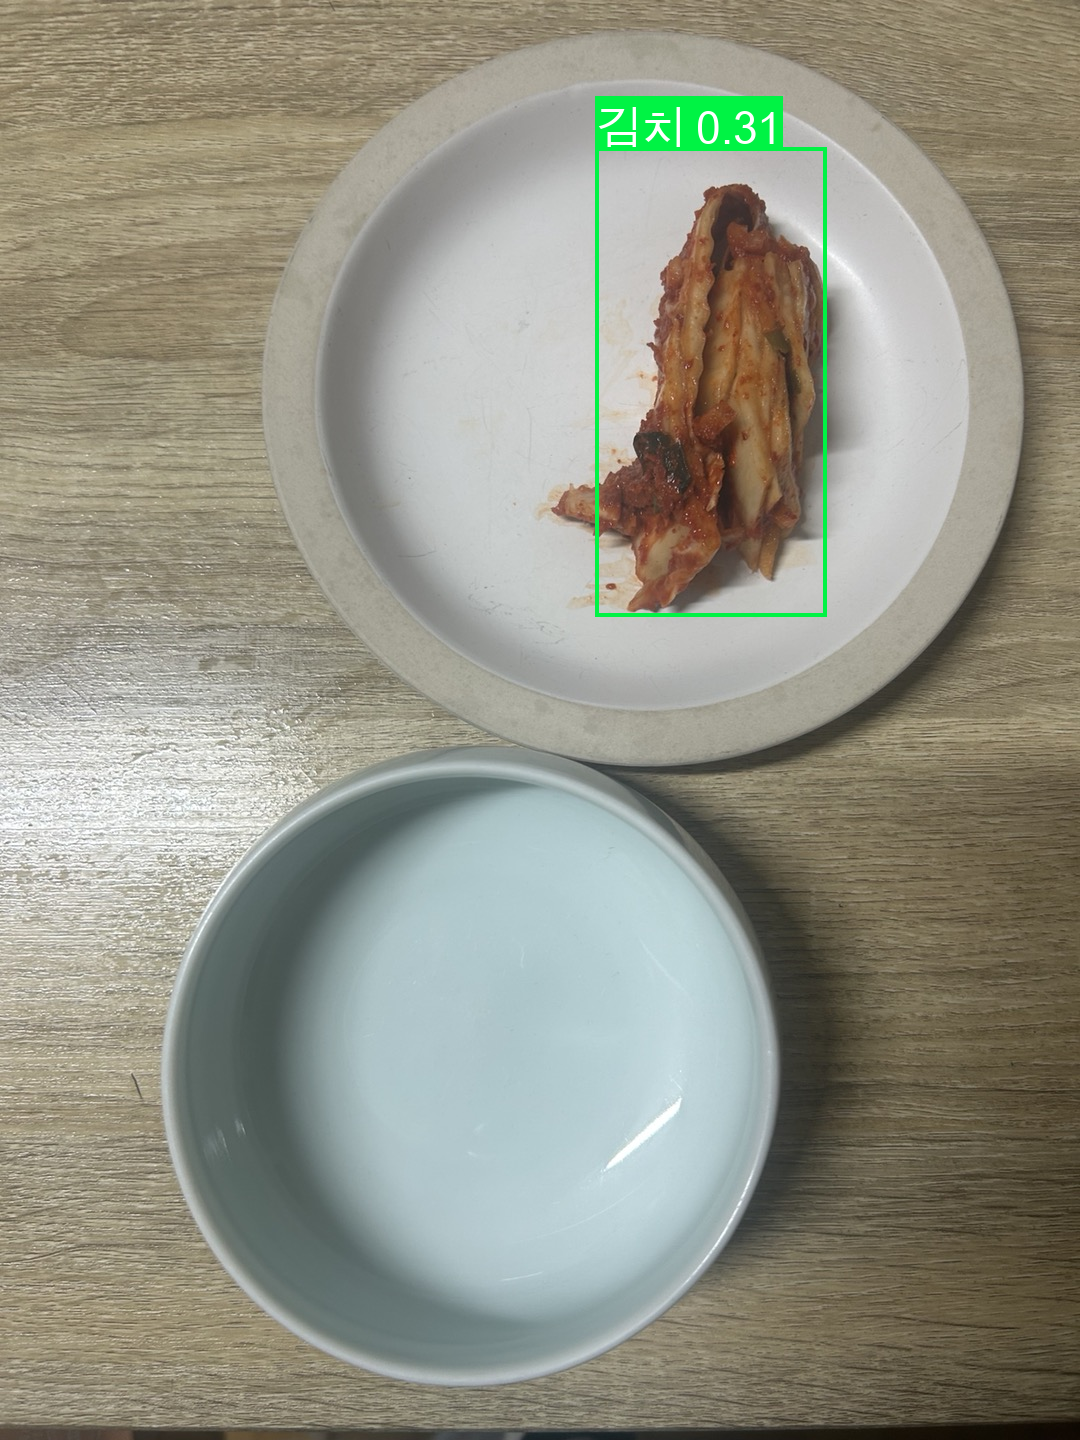

Bounding box: [tensor(595.93604), tensor(147.50459), tensor(826.19904), tensor(616.49048)], Class: 8.0, Confidence: 0.31203901767730713


In [ ]:
# prompt:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')
# # 이미지 로드
img = '/content/밥김치_후2.jpg'
# 이어서 여러 객체 찾도록 코드

# 모델 실행
results = model(img)

# 결과 출력
results.print()
results.show()

# 객체 정보 추출 (예: bounding box 좌표, 클래스, 신뢰도)
for *xyxy, conf, cls in results.xyxy[0]:
    print(f"Bounding box: {xyxy}, Class: {cls}, Confidence: {conf}")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1440x1080 (no detections)
Speed: 41.2ms pre-process, 355.3ms inference, 0.5ms NMS per image at shape (1, 3, 640, 480)


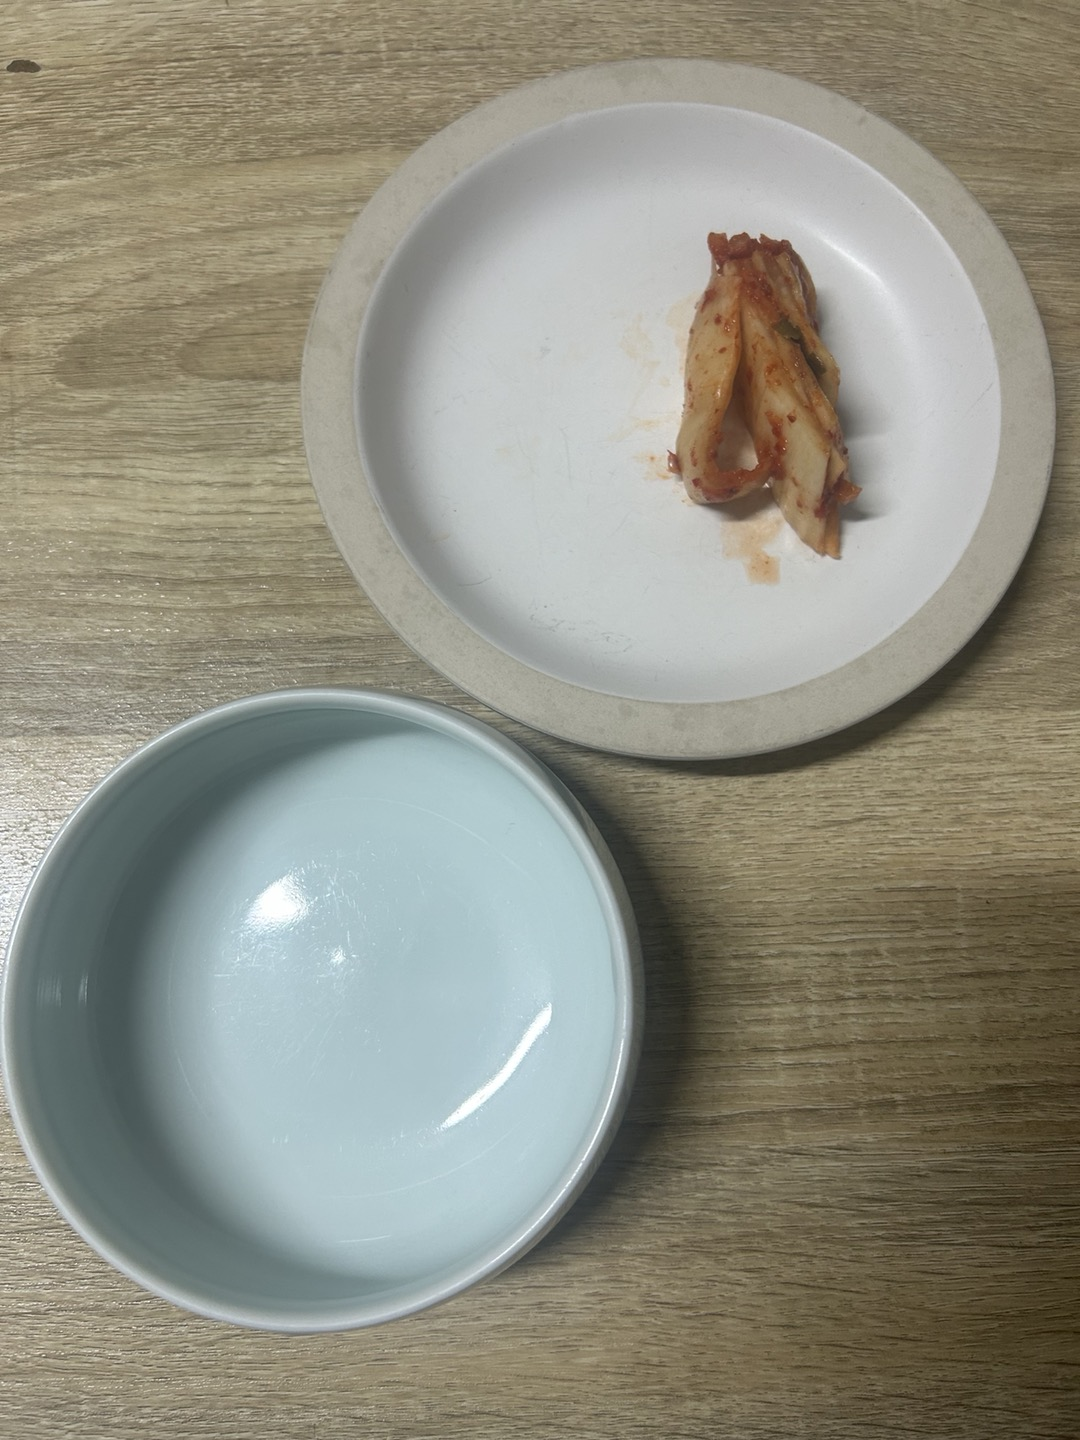

Result image saved to /content/밥김치_with_boxes.jpg


In [ ]:
import cv2
import numpy as np

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# 이미지 로드
img_path = '/content/밥김치_후.jpg'
img = cv2.imread(img_path)

# 모델 실행
results = model(img_path)

# 결과 출력
results.print()
results.show()

# 이미지 복제본 생성 (bounding box 시각화를 위해)
img_with_boxes = img.copy()

# 객체 정보 추출 및 픽셀 넓이 계산
for *xyxy, conf, cls in results.xyxy[0]:
    x1, y1, x2, y2 = map(int, xyxy)  # Bounding box 좌표 (정수로 변환)
    width = x2 - x1  # 가로 길이
    height = y2 - y1  # 세로 길이
    pixel_area = width * height  # Bounding box 넓이 (픽셀 단위)

    # Bounding box 그리기
    cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 클래스 및 신뢰도 표시
    label = f"Class: {int(cls)}, Confidence: {conf:.2f}, Area: {pixel_area}px"
    cv2.putText(img_with_boxes, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # 결과 출력
    print(f"Bounding box: {x1, y1, x2, y2}, Class: {cls}, Confidence: {conf:.2f}, Pixel Area: {pixel_area}px")

# 결과 이미지 저장 및 시각화
output_path = '/content/밥김치_with_boxes.jpg'
cv2.imwrite(output_path, img_with_boxes)
print(f"Result image saved to {output_path}")

# 시각화
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# 섭취 전후 이미지 경로
img_before_path = '/content/밥김치.jpg'
img_after_path = '/content/밥김치_후2.jpg'

# 객체 픽셀 영역 계산 및 시각화 함수
def calculate_areas_and_visualize(img_path, output_path):
    img = cv2.imread(img_path)
    results = model(img_path)
    img_with_mask = img.copy()

    # 객체별 픽셀 영역 저장을 위한 딕셔너리
    object_areas = {}

    # 다양한 HSV 범위 설정
    hsv_ranges = [
        (np.array([0, 30, 30]), np.array([20, 255, 255])),   # 밝은 색 밥 알갱이 범위
        (np.array([20, 50, 50]), np.array([50, 255, 255])),  # 중간 색상 범위
        (np.array([50, 40, 40]), np.array([90, 255, 255]))   # 어두운 색 밥 알갱이 범위
    ]

    for *xyxy, conf, cls in results.xyxy[0]:
        x1, y1, x2, y2 = map(int, xyxy)  # Bounding box 좌표
        roi = img[y1:y2, x1:x2]

        # 마스크 초기화
        combined_mask = np.zeros(roi.shape[:2], dtype=np.uint8)

        # 각 HSV 범위에 대해 마스크 생성 및 결합
        hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        for (lower, upper) in hsv_ranges:
            mask = cv2.inRange(hsv_roi, lower, upper)
            combined_mask = cv2.bitwise_or(combined_mask, mask)  # 마스크 병합

        # 경계선 추출
        contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # 정확한 픽셀 면적 계산
        mask_area = sum(cv2.contourArea(contour) for contour in contours)

        # 객체 클래스별 픽셀 면적 저장 (cls를 키로 사용)
        if cls not in object_areas:
            object_areas[cls] = 0
        object_areas[cls] += mask_area  # 동일 객체의 영역 합산

        # 경계선 그리기
        cv2.drawContours(img_with_mask[y1:y2, x1:x2], contours, -1, (0, 255, 0), 2)

        # 클래스 및 면적 정보 표시
        label = f"Class: {int(cls)}, Area: {mask_area:.0f}px"
        cv2.putText(img_with_mask, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # 결과 이미지 저장
    cv2.imwrite(output_path, img_with_mask)
    print(f"Result image saved to {output_path}")

    return object_areas

# 섭취 전후 이미지의 객체별 픽셀 영역 계산 및 시각화
areas_before = calculate_areas_and_visualize(img_before_path, '/content/밥김치_전_with_mask.jpg')
areas_after = calculate_areas_and_visualize(img_after_path, '/content/밥김치_후_with_mask.jpg')

# 섭취량 계산 및 출력
print("객체별 섭취량 (픽셀 단위 및 % 단위):")
for cls in areas_before:
    before_area = areas_before.get(cls, 0)
    after_area = areas_after.get(cls, 0)
    consumed_area = before_area - after_area
    consumed_percentage = (consumed_area / before_area) * 100 if before_area > 0 else 0
    print(f"Class {int(cls)}: 섭취량 = {consumed_area:.0f} 픽셀 ({consumed_percentage:.2f}%) "
          f"(전: {before_area:.0f} 픽셀, 후: {after_area:.0f} 픽셀)")

# 섭취 전 이미지 시각화
img_before_with_mask = cv2.imread('/content/밥김치_전_with_mask.jpg')
plt.figure(figsize=(10, 10))
plt.title("섭취 전 이미지")
plt.imshow(cv2.cvtColor(img_before_with_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 섭취 후 이미지 시각화
img_after_with_mask = cv2.imread('/content/밥김치_후_with_mask.jpg')
plt.figure(figsize=(10, 10))
plt.title("섭취 후 이미지")
plt.imshow(cv2.cvtColor(img_after_with_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Result image saved to /content/밥김치_전_with_mask.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Result image saved to /content/밥김치_후_with_mask.jpg
객체별 섭취량 (픽셀 단위 및 % 단위):
Class 0: 섭취량 = 111734 픽셀 (100.00%) (전: 111734 픽셀, 후: 0 픽셀)
Class 8: 섭취량 = 113548 픽셀 (100.00%) (전: 113548 픽셀, 후: 0 픽셀)


In [ ]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

# YOLOv5 모델 로드 (confidence를 낮추기 위해 설정값 추가)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')
model.conf = 0.25  # 신뢰도 임계값 낮추기

# 섭취 전후 이미지 경로
img_before_path = '/content/밥김치.jpg'
img_after_path = '/content/밥김치_후2.jpg'

# 추가적인 색상 기반 탐지 함수
def detect_kimchi_with_color(img, hsv_ranges):
    # HSV 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 여러 HSV 범위에 대한 마스크 결합
    combined_mask = np.zeros(hsv.shape[:2], dtype=np.uint8)
    for (lower, upper) in hsv_ranges:
        mask = cv2.inRange(hsv, lower, upper)
        combined_mask = cv2.bitwise_or(combined_mask, mask)

    # 경계선 찾기
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# 객체 픽셀 영역 계산 및 시각화 함수
def calculate_areas_and_visualize(img_path, output_path):
    img = cv2.imread(img_path)
    results = model(img_path)
    img_with_mask = img.copy()

    # 객체별 픽셀 영역 저장을 위한 딕셔너리
    object_areas = {}

    # 김치 인식을 위한 다양한 HSV 범위 설정
    hsv_ranges = [
        (np.array([0, 70, 50]), np.array([10, 255, 255])),   # 빨간색 김치 범위
        (np.array([170, 70, 50]), np.array([180, 255, 255])) # 주황/붉은색 범위
    ]

    # YOLO로 인식된 객체 처리
    for *xyxy, conf, cls in results.xyxy[0]:
        x1, y1, x2, y2 = map(int, xyxy)  # Bounding box 좌표
        roi = img[y1:y2, x1:x2]

        # 마스크 초기화
        combined_mask = np.zeros(roi.shape[:2], dtype=np.uint8)

        # 각 HSV 범위에 대해 마스크 생성 및 결합
        hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        for (lower, upper) in hsv_ranges:
            mask = cv2.inRange(hsv_roi, lower, upper)
            combined_mask = cv2.bitwise_or(combined_mask, mask)  # 마스크 병합

        # 경계선 추출
        contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # 정확한 픽셀 면적 계산
        mask_area = sum(cv2.contourArea(contour) for contour in contours)

        # 객체 클래스별 픽셀 면적 저장 (cls를 키로 사용)
        if cls not in object_areas:
            object_areas[cls] = 0
        object_areas[cls] += mask_area  # 동일 객체의 영역 합산

        # 경계선 그리기
        cv2.drawContours(img_with_mask[y1:y2, x1:x2], contours, -1, (0, 255, 0), 2)

        # 클래스 및 면적 정보 표시
        label = f"Class: {int(cls)}, Area: {mask_area:.0f}px"
        cv2.putText(img_with_mask, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # YOLO가 인식하지 못한 김치 탐지를 위해 색상 기반 추가 탐지
    additional_contours = detect_kimchi_with_color(img, hsv_ranges)
    for contour in additional_contours:
        area = cv2.contourArea(contour)
        if area > 100:  # 너무 작은 영역 제외
            cv2.drawContours(img_with_mask, [contour], -1, (255, 0, 0), 2)  # 파란색 경계로 표시
            cv2.putText(img_with_mask, f"Kimchi, Area: {area:.0f}px", tuple(contour[0][0]),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # 결과 이미지 저장
    cv2.imwrite(output_path, img_with_mask)
    print(f"Result image saved to {output_path}")

    return object_areas

# 섭취 전후 이미지의 객체별 픽셀 영역 계산 및 시각화
areas_before = calculate_areas_and_visualize(img_before_path, '/content/밥김치_전_with_mask.jpg')
areas_after = calculate_areas_and_visualize(img_after_path, '/content/밥김치_후_with_mask.jpg')

# 섭취량 계산 및 출력
print("객체별 섭취량 (픽셀 단위):")
for cls in areas_before:
    before_area = areas_before.get(cls, 0)
    after_area = areas_after.get(cls, 0)
    consumed_area = before_area - after_area
    print(f"Class {int(cls)}: 섭취량 = {consumed_area:.0f} 픽셀 (전: {before_area:.0f} 픽셀, 후: {after_area:.0f} 픽셀)")

# 섭취 전 이미지 시각화
img_before_with_mask = cv2.imread('/content/밥김치_전_with_mask.jpg')
plt.figure(figsize=(10, 10))
plt.title("섭취 전 이미지")
plt.imshow(cv2.cvtColor(img_before_with_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 섭취 후 이미지 시각화
img_after_with_mask = cv2.imread('/content/밥김치_후_with_mask.jpg')
plt.figure(figsize=(10, 10))
plt.title("섭취 후 이미지")
plt.imshow(cv2.cvtColor(img_after_with_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Result image saved to /content/밥김치_전_with_mask.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Result image saved to /content/밥김치_후_with_mask.jpg
객체별 섭취량 (픽셀 단위):
Class 0: 섭취량 = 59150 픽셀 (전: 59150 픽셀, 후: 0 픽셀)
Class 8: 섭취량 = 18938 픽셀 (전: 18938 픽셀, 후: 0 픽셀)


In [ ]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# 섭취 전후 이미지 경로
img_before_path = '/content/밥김치.jpg'
img_after_path = '/content/밥김치_후2.jpg'

# 객체 픽셀 영역 계산 함수
def calculate_areas(img_path):
    img = cv2.imread(img_path)
    results = model(img_path)

    # 객체별 픽셀 영역 저장을 위한 딕셔너리
    object_areas = {}

    # 다양한 HSV 범위 설정 (밥, 김치 등 다양한 음식 색상 범위를 커버)
    hsv_ranges = [
        (np.array([0, 30, 30]), np.array([20, 255, 255])),   # 밝은 색 밥 알갱이 범위
        (np.array([20, 50, 50]), np.array([50, 255, 255])),  # 중간 색상 범위
        (np.array([50, 40, 40]), np.array([90, 255, 255]))   # 어두운 색 밥 알갱이 범위
    ]

    for *xyxy, conf, cls in results.xyxy[0]:
        x1, y1, x2, y2 = map(int, xyxy)  # Bounding box 좌표
        roi = img[y1:y2, x1:x2]

        # 마스크 초기화
        combined_mask = np.zeros(roi.shape[:2], dtype=np.uint8)

        # 각 HSV 범위에 대해 마스크 생성 및 결합
        hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        for (lower, upper) in hsv_ranges:
            mask = cv2.inRange(hsv_roi, lower, upper)
            combined_mask = cv2.bitwise_or(combined_mask, mask)  # 마스크 병합

        # 경계선 추출
        contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # 정확한 픽셀 면적 계산
        mask_area = sum(cv2.contourArea(contour) for contour in contours)

        # 객체 클래스별 픽셀 면적 저장 (cls를 키로 사용)
        if cls not in object_areas:
            object_areas[cls] = 0
        object_areas[cls] += mask_area  # 동일 객체의 영역 합산

    return object_areas

# 섭취 전후 이미지의 객체별 픽셀 영역 계산
areas_before = calculate_areas(img_before_path)
areas_after = calculate_areas(img_after_path)

# 섭취량 계산 및 출력
print("객체별 섭취량 (픽셀 단위):")
for cls in areas_before:
    before_area = areas_before.get(cls, 0)
    after_area = areas_after.get(cls, 0)
    consumed_area = before_area - after_area
    print(f"Class {int(cls)}: 섭취량 = {consumed_area:.0f} 픽셀 (전: {before_area:.0f} 픽셀, 후: {after_area:.0f} 픽셀)")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


객체별 섭취량 (픽셀 단위):
Class 0: 섭취량 = 111734 픽셀 (전: 111734 픽셀, 후: 0 픽셀)
Class 8: 섭취량 = 113548 픽셀 (전: 113548 픽셀, 후: 0 픽셀)


In [ ]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# 섭취 전후 이미지 경로
img_before_path = '/content/밥김치.jpg'
img_after_path = '/content/밥김치_후2.jpg'

# 객체 픽셀 영역 계산 및 시각화 함수
def calculate_areas_and_visualize(img_path, output_path):
    img = cv2.imread(img_path)
    results = model(img_path)
    img_with_mask = img.copy()

    # 객체별 픽셀 영역 저장을 위한 딕셔너리
    object_areas = {}

    # 다양한 HSV 범위 설정
    hsv_ranges = [
        (np.array([0, 30, 30]), np.array([20, 255, 255])),   # 밝은 색 밥 알갱이 범위
        (np.array([20, 50, 50]), np.array([50, 255, 255])),  # 중간 색상 범위
        (np.array([50, 40, 40]), np.array([90, 255, 255]))   # 어두운 색 밥 알갱이 범위
    ]

    for *xyxy, conf, cls in results.xyxy[0]:
        x1, y1, x2, y2 = map(int, xyxy)  # Bounding box 좌표
        roi = img[y1:y2, x1:x2]

        # 마스크 초기화
        combined_mask = np.zeros(roi.shape[:2], dtype=np.uint8)

        # 각 HSV 범위에 대해 마스크 생성 및 결합
        hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        for (lower, upper) in hsv_ranges:
            mask = cv2.inRange(hsv_roi, lower, upper)
            combined_mask = cv2.bitwise_or(combined_mask, mask)  # 마스크 병합

        # 경계선 추출
        contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # 정확한 픽셀 면적 계산
        mask_area = sum(cv2.contourArea(contour) for contour in contours)

        # 객체 클래스별 픽셀 면적 저장 (cls를 키로 사용)
        if cls not in object_areas:
            object_areas[cls] = 0
        object_areas[cls] += mask_area  # 동일 객체의 영역 합산

        # 경계선 그리기
        cv2.drawContours(img_with_mask[y1:y2, x1:x2], contours, -1, (0, 255, 0), 2)

        # 클래스 및 면적 정보 표시
        label = f"Class: {int(cls)}, Area: {mask_area:.0f}px"
        cv2.putText(img_with_mask, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # 결과 이미지 저장
    cv2.imwrite(output_path, img_with_mask)
    return object_areas

# 섭취 전후 이미지의 객체별 픽셀 영역 계산 및 시각화
areas_before = calculate_areas_and_visualize(img_before_path, '/content/밥김치_전_with_mask.jpg')
areas_after = calculate_areas_and_visualize(img_after_path, '/content/밥김치_후_with_mask.jpg')

# 섭취량 계산 및 출력
print("객체별 섭취량 (픽셀 단위):")
for cls in areas_before:
    before_area = areas_before.get(cls, 0)
    after_area = areas_after.get(cls, 0)
    consumed_area = before_area - after_area
    print(f"Class {int(cls)}: 섭취량 = {consumed_area:.0f} 픽셀 (전: {before_area:.0f} 픽셀, 후: {after_area:.0f} 픽셀)")

# 섭취 전 이미지 시각화
img_before_with_mask = cv2.imread('/content/밥김치_전_with_mask.jpg')
plt.figure(figsize=(10, 10))
plt.title("섭취 전 이미지")
plt.imshow(cv2.cvtColor(img_before_with_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 섭취 후 이미지 시각화
img_after_with_mask = cv2.imread('/content/밥김치_후_with_mask.jpg')
plt.figure(figsize=(10, 10))
plt.title("섭취 후 이미지")
plt.imshow(cv2.cvtColor(img_after_with_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


객체별 섭취량 (픽셀 단위):
Class 0: 섭취량 = 111734 픽셀 (전: 111734 픽셀, 후: 0 픽셀)
Class 8: 섭취량 = 113548 픽셀 (전: 113548 픽셀, 후: 0 픽셀)


In [ ]:
# 섭취량 계산 및 출력
print("객체별 섭취량 (픽셀 단위):")
for cls in set(areas_before.keys()).union(areas_after.keys()):  # 모든 클래스 포함
    before_area = areas_before.get(cls, 0)
    after_area = areas_after.get(cls, 0)
    consumed_area = before_area - after_area  # 섭취량 계산

    # 디버깅용 출력
    print(f"Class {int(cls)}:")
    print(f"  전: {before_area:.0f} 픽셀")
    print(f"  후: {after_area:.0f} 픽셀")
    print(f"  섭취량: {consumed_area:.0f} 픽셀")
    print("-" * 30)

    # 시각화 추가 (옵션)
    if consumed_area != 0:
        print(f"Class {int(cls)} 섭취량: {consumed_area:.0f} 픽셀")


객체별 섭취량 (픽셀 단위):
Class 0:
  전: 111734 픽셀
  후: 0 픽셀
  섭취량: 111734 픽셀
------------------------------
Class 0 섭취량: 111734 픽셀
Class 8:
  전: 0 픽셀
  후: 67770 픽셀
  섭취량: -67770 픽셀
------------------------------
Class 8 섭취량: -67770 픽셀
Class 8:
  전: 113548 픽셀
  후: 0 픽셀
  섭취량: 113548 픽셀
------------------------------
Class 8 섭취량: 113548 픽셀


In [ ]:
# 섭취 전후 이미지에서 탐지된 클래스 및 바운딩 박스 확인
print("섭취 전 이미지 탐지 결과:")
for *xyxy, conf, cls in model(img_before_path).xyxy[0]:
    print(f"Class: {int(cls)}, Confidence: {conf:.2f}, Bounding Box: {xyxy}")

print("\n섭취 후 이미지 탐지 결과:")
for *xyxy, conf, cls in model(img_after_path).xyxy[0]:
    print(f"Class: {int(cls)}, Confidence: {conf:.2f}, Bounding Box: {xyxy}")


섭취 전 이미지 탐지 결과:


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Class: 0, Confidence: 0.51, Bounding Box: [tensor(259.08652), tensor(853.02252), tensor(662.08997), tensor(1233.88208)]
Class: 8, Confidence: 0.51, Bounding Box: [tensor(315.47357), tensor(149.74481), tensor(699.10577), tensor(546.10876)]

섭취 후 이미지 탐지 결과:


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Class: 8, Confidence: 0.31, Bounding Box: [tensor(595.93604), tensor(147.50459), tensor(826.19904), tensor(616.49048)]


In [ ]:
# 각 이미지의 클래스별 면적 확인
print("섭취 전 이미지의 클래스별 면적:")
print(areas_before)

print("\n섭취 후 이미지의 클래스별 면적:")
print(areas_after)


섭취 전 이미지의 클래스별 면적:
{tensor(0.): 111734.5, tensor(8.): 113547.5}

섭취 후 이미지의 클래스별 면적:
{tensor(8.): 67769.5}


In [ ]:
# 섭취량 계산 및 퍼센트 변환
print("객체별 섭취량 및 섭취 비율 (%):")

# 모든 클래스에 대해 섭취량 계산
for cls in set(areas_before.keys()).union(areas_after.keys()):
    before_area = areas_before.get(cls, 0)  # 섭취 전 면적 (없으면 0)
    after_area = areas_after.get(cls, 0)   # 섭취 후 면적 (없으면 0)
    consumed_area = before_area - after_area  # 섭취량 계산

    # 섭취 비율 계산
    consumed_percentage = (consumed_area / before_area) * 100 if before_area > 0 else 0

    # 결과 출력
    print(f"Class {int(cls)}:")
    print(f"  섭취 전: {before_area:.1f} 픽셀")
    print(f"  섭취 후: {after_area:.1f} 픽셀")
    print(f"  섭취량: {consumed_area:.1f} 픽셀")
    print(f"  섭취 비율: {consumed_percentage:.2f}%")
    print("-" * 30)


객체별 섭취량 및 섭취 비율 (%):
Class 0:
  섭취 전: 111734.5 픽셀
  섭취 후: 0.0 픽셀
  섭취량: 111734.5 픽셀
  섭취 비율: 100.00%
------------------------------
Class 8:
  섭취 전: 0.0 픽셀
  섭취 후: 67769.5 픽셀
  섭취량: -67769.5 픽셀
  섭취 비율: 0.00%
------------------------------
Class 8:
  섭취 전: 113547.5 픽셀
  섭취 후: 0.0 픽셀
  섭취량: 113547.5 픽셀
  섭취 비율: 100.00%
------------------------------


In [ ]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# 섭취 전후 이미지 경로
img_before_path = '/content/밥김치.jpg'
img_after_path = '/content/밥김치_후2.jpg'

# 객체 픽셀 영역 계산 및 시각화 함수
def calculate_areas_and_visualize(img_path, output_path):
    img = cv2.imread(img_path)
    results = model(img_path)
    img_with_mask = img.copy()

    # 객체별 픽셀 영역 저장을 위한 딕셔너리
    object_areas = {}

    # 다양한 HSV 범위 설정
    hsv_ranges = [
        (np.array([0, 30, 30]), np.array([20, 255, 255])),   # 밝은 색 밥 알갱이 범위
        (np.array([20, 50, 50]), np.array([50, 255, 255])),  # 중간 색상 범위
        (np.array([50, 40, 40]), np.array([90, 255, 255]))   # 어두운 색 밥 알갱이 범위
    ]

    for *xyxy, conf, cls in results.xyxy[0]:
        x1, y1, x2, y2 = map(int, xyxy)  # Bounding box 좌표
        roi = img[y1:y2, x1:x2]

        # 마스크 초기화
        combined_mask = np.zeros(roi.shape[:2], dtype=np.uint8)

        # 각 HSV 범위에 대해 마스크 생성 및 결합
        hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        for (lower, upper) in hsv_ranges:
            mask = cv2.inRange(hsv_roi, lower, upper)
            combined_mask = cv2.bitwise_or(combined_mask, mask)  # 마스크 병합

        # 경계선 추출
        contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # 정확한 픽셀 면적 계산
        mask_area = sum(cv2.contourArea(contour) for contour in contours)

        # 객체 클래스별 픽셀 면적 저장 (cls를 키로 사용)
        if cls not in object_areas:
            object_areas[cls] = 0
        object_areas[cls] += mask_area  # 동일 객체의 영역 합산

        # 경계선 그리기
        cv2.drawContours(img_with_mask[y1:y2, x1:x2], contours, -1, (0, 255, 0), 2)

        # 클래스 및 면적 정보 표시
        label = f"Class: {int(cls)}, Area: {mask_area:.0f}px"
        cv2.putText(img_with_mask, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # 결과 이미지 저장
    cv2.imwrite(output_path, img_with_mask)
    return object_areas

# 섭취 전후 이미지의 객체별 픽셀 영역 계산 및 시각화
areas_before = calculate_areas_and_visualize(img_before_path, '/content/밥김치_전_with_mask.jpg')
areas_after = calculate_areas_and_visualize(img_after_path, '/content/밥김치_후_with_mask.jpg')

# 섭취량 계산 및 출력
print("객체별 섭취량 및 섭취 비율 (%):")

for cls in set(areas_before.keys()).union(areas_after.keys()):
    before_area = areas_before.get(cls, 0)  # 섭취 전 면적 (없으면 0)
    after_area = areas_after.get(cls, 0)   # 섭취 후 면적 (없으면 0)
    consumed_area = before_area - after_area  # 섭취량 계산

    # 섭취 비율 계산
    consumed_percentage = (consumed_area / before_area) * 100 if before_area > 0 else 0

    # 결과 출력
    print(f"Class {int(cls)}:")
    print(f"  섭취 전: {before_area:.1f} 픽셀")
    print(f"  섭취 후: {after_area:.1f} 픽셀")
    print(f"  섭취량: {consumed_area:.1f} 픽셀")
    print(f"  섭취 비율: {consumed_percentage:.2f}%")
    print("-" * 30)

# 섭취 전 이미지 시각화
img_before_with_mask = cv2.imread('/content/밥김치_전_with_mask.jpg')
plt.figure(figsize=(10, 10))
plt.title("섭취 전 이미지")
plt.imshow(cv2.cvtColor(img_before_with_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 섭취 후 이미지 시각화
img_after_with_mask = cv2.imread('/content/밥김치_후_with_mask.jpg')
plt.figure(figsize=(10, 10))
plt.title("섭취 후 이미지")
plt.imshow(cv2.cvtColor(img_after_with_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


객체별 섭취량 및 섭취 비율 (%):
Class 0:
  섭취 전: 111734.5 픽셀
  섭취 후: 0.0 픽셀
  섭취량: 111734.5 픽셀
  섭취 비율: 100.00%
------------------------------
Class 8:
  섭취 전: 113547.5 픽셀
  섭취 후: 0.0 픽셀
  섭취량: 113547.5 픽셀
  섭취 비율: 100.00%
------------------------------
Class 8:
  섭취 전: 0.0 픽셀
  섭취 후: 67769.5 픽셀
  섭취량: -67769.5 픽셀
  섭취 비율: 0.00%
------------------------------


In [ ]:
# 섭취량 계산 및 출력 (중복 클래스 처리)
print("객체별 섭취량 및 섭취 비율 (%):")

# 모든 클래스 ID를 set으로 처리해 중복 제거
all_classes = set(areas_before.keys()).union(set(areas_after.keys()))

for cls in all_classes:
    before_area = areas_before.get(cls, 0)  # 섭취 전 면적 (없으면 0)
    after_area = areas_after.get(cls, 0)   # 섭취 후 면적 (없으면 0)
    consumed_area = before_area - after_area  # 섭취량 계산

    # 섭취 비율 계산
    consumed_percentage = (consumed_area / before_area) * 100 if before_area > 0 else 0

    # 결과 출력
    print(f"Class {int(cls)}:")
    print(f"  섭취 전: {before_area:.1f} 픽셀")
    print(f"  섭취 후: {after_area:.1f} 픽셀")
    print(f"  섭취량: {consumed_area:.1f} 픽셀")
    print(f"  섭취 비율: {consumed_percentage:.2f}%")
    print("-" * 30)


객체별 섭취량 및 섭취 비율 (%):
Class 0:
  섭취 전: 111734.5 픽셀
  섭취 후: 0.0 픽셀
  섭취량: 111734.5 픽셀
  섭취 비율: 100.00%
------------------------------
Class 8:
  섭취 전: 113547.5 픽셀
  섭취 후: 0.0 픽셀
  섭취량: 113547.5 픽셀
  섭취 비율: 100.00%
------------------------------
Class 8:
  섭취 전: 0.0 픽셀
  섭취 후: 67769.5 픽셀
  섭취량: -67769.5 픽셀
  섭취 비율: 0.00%
------------------------------


In [ ]:
# GPT 프롬프트 생성 함수
def create_prompt(user_info, recommended_intake, consumption_data):
    prompt = f"""
    사용자 정보: 나이 {user_info['age']}세, 성별 {user_info['gender']}
    하루 권장 섭취량:
    - 칼로리: {recommended_intake['calories']}
    - 단백질: {recommended_intake['protein']}, 탄수화물: {recommended_intake['carbs']}, 지방: {recommended_intake['fat']}

    사용자가 섭취한 영양 성분 (하루 기준):
    - 아침: 탄수화물 {consumption_data['breakfast']['carbs']}g, 단백질 {consumption_data['breakfast']['protein']}g, 지방 {consumption_data['breakfast']['fat']}g
    - 점심: 탄수화물 {consumption_data['lunch']['carbs']}g, 단백질 {consumption_data['lunch']['protein']}g, 지방 {consumption_data['lunch']['fat']}g
    - 저녁: 탄수화물 {consumption_data['dinner']['carbs']}g, 단백질 {consumption_data['dinner']['protein']}g, 지방 {consumption_data['dinner']['fat']}g

    하루 권장 섭취량 대비 부족하거나 과다한 영양소를 분석하고, 이를 보충하기 위한 식단과 개선 방안을 제안해 주세요.
    """
    return prompt

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1440x1080 1 밥, 1 김치
Speed: 38.3ms pre-process, 530.5ms inference, 1.4ms NMS per image at shape (1, 3, 640, 480)


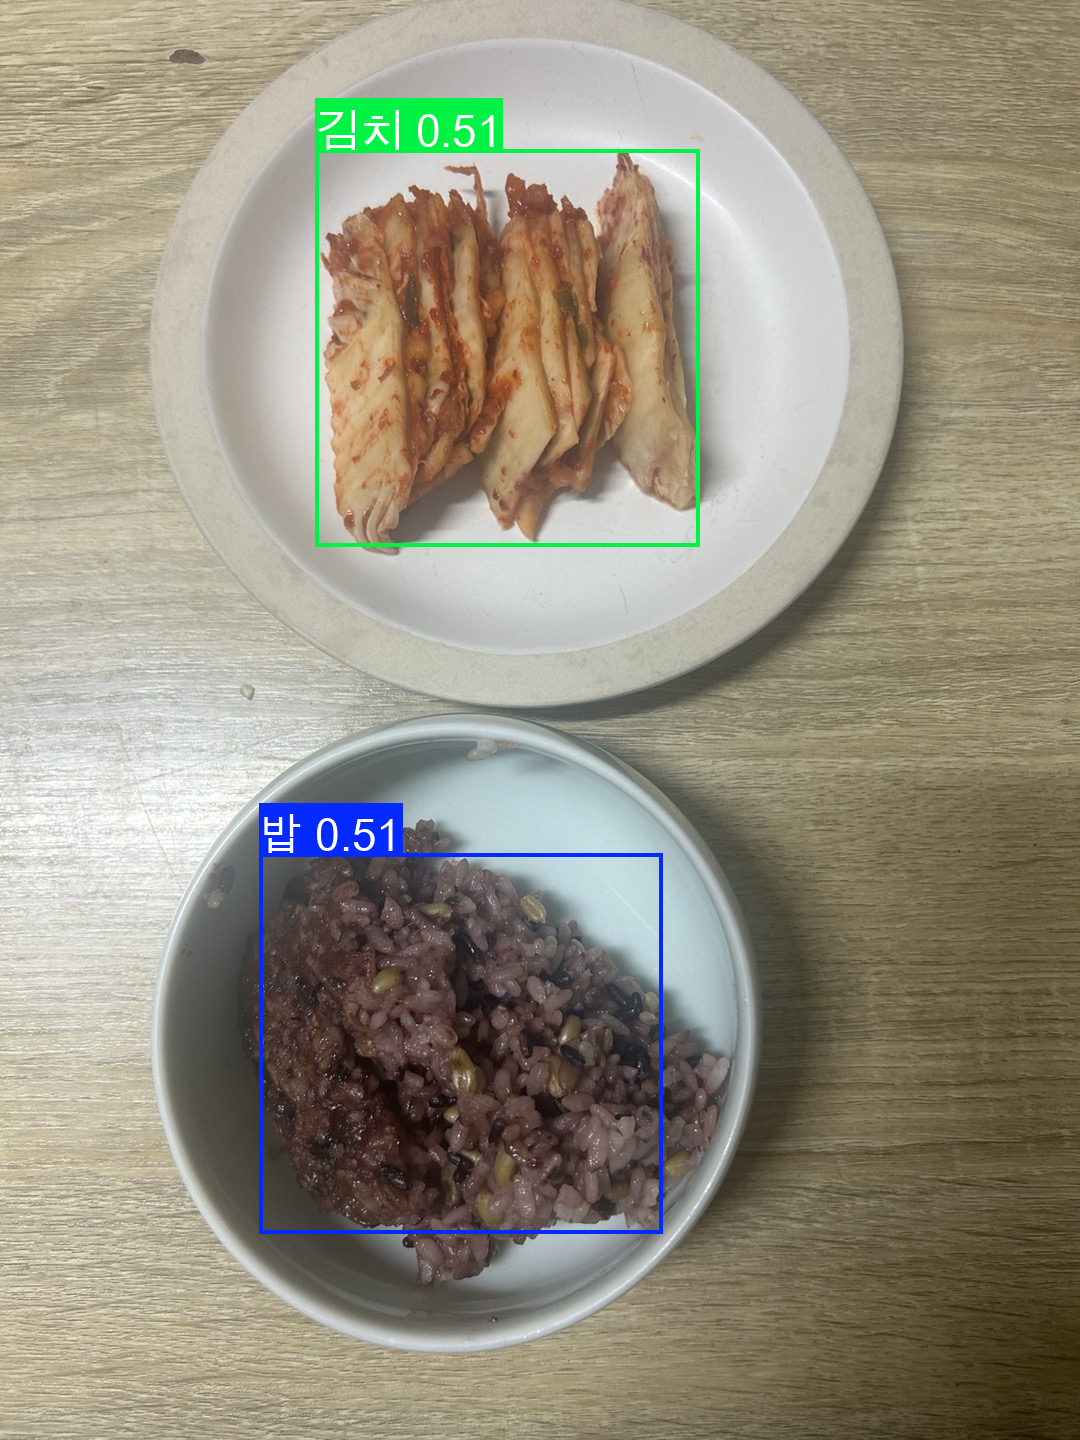

Class: 0.0, Confidence: 0.51, Exact Pixel Area: 111734px
Class: 8.0, Confidence: 0.51, Exact Pixel Area: 113548px
Result image saved to /content/밥김치_with_adjusted_mask.jpg


In [ ]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# 이미지 로드
img_path = '/content/밥김치.jpg'
img = cv2.imread(img_path)

# 모델 실행
results = model(img_path)

# 결과 출력
results.print()
results.show()

# 결과 이미지 복제본
img_with_mask = img.copy()

# 다양한 HSV 범위 설정
hsv_ranges = [
    (np.array([0, 30, 30]), np.array([20, 255, 255])),   # 밝은 색 밥 알갱이 범위
    (np.array([20, 50, 50]), np.array([50, 255, 255])),  # 중간 색상 범위
    (np.array([50, 40, 40]), np.array([90, 255, 255]))   # 어두운 색 밥 알갱이 범위
]

# 마스크 및 경계 추출
for *xyxy, conf, cls in results.xyxy[0]:
    x1, y1, x2, y2 = map(int, xyxy)  # Bounding box 좌표 (정수 변환)

    # ROI 추출
    roi = img[y1:y2, x1:x2]

    # 마스크 초기화
    combined_mask = np.zeros(roi.shape[:2], dtype=np.uint8)

    # 각 HSV 범위에 대해 마스크 생성 및 결합
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    for (lower, upper) in hsv_ranges:
        mask = cv2.inRange(hsv_roi, lower, upper)
        combined_mask = cv2.bitwise_or(combined_mask, mask)  # 마스크 병합

    # 경계선 추출
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 정확한 경계를 따라 픽셀 계산
    mask_area = 0
    for contour in contours:
        mask_area += cv2.contourArea(contour)  # 경계선 내부의 픽셀 수 계산

    # 경계선 그리기
    cv2.drawContours(img_with_mask[y1:y2, x1:x2], contours, -1, (0, 255, 0), 2)

    # 클래스 및 면적 정보 표시
    label = f"Class: {int(cls)}, Area: {mask_area:.0f}px"
    cv2.putText(img_with_mask, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # 결과 출력
    print(f"Class: {cls}, Confidence: {conf:.2f}, Exact Pixel Area: {mask_area:.0f}px")

# 결과 이미지 저장
output_path = '/content/밥김치_with_adjusted_mask.jpg'
cv2.imwrite(output_path, img_with_mask)
print(f"Result image saved to {output_path}")

# 이미지 시각화
plt.imshow(cv2.cvtColor(img_with_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# 테스트할 해상도 리스트
img_sizes = [500]

# 각 해상도에 대해 모델 실행 및 결과 출력
for size in img_sizes:
    print(f"Testing with image size: {size}")

    # 모델 실행
    results = model(img, size=size)
    results.print()

    # 결과 이미지 생성 및 바운딩 박스 시각화
    results.save()  # 예측된 이미지를 파일로 저장 (디폴트 저장 위치: runs/detect/exp)
    result_img_path = results.files[0]  # 저장된 결과 이미지 경로
    result_img = Image.open(result_img_path)

    # 이미지 크기 조정 및 회전
    resized_rotated_img = result_img.resize((result_img.width // 2, result_img.height // 2)).rotate(-90, expand=True)

    # 바운딩 박스 그리기
    draw = ImageDraw.Draw(resized_rotated_img)
    df = results.pandas().xyxy[0]  # 바운딩 박스 정보를 DataFrame으로 가져옴

    for _, row in df.iterrows():
        # 바운딩 박스 좌표 가져오기
        x1, y1, x2, y2 = row['xmin'], row['ymin'], row['xmax'], row['ymax']

        # 바운딩 박스 그리기 (예: 빨간색, 두께 2)
        draw.rectangle([(x1, y1), (x2, y2)], outline="red", width=2)

        # 클래스 이름과 신뢰도 추가 (예: 위에 클래스와 신뢰도 표시)
        label = f"{row['name']} {row['confidence']:.2f}"
        draw.text((x1, y1 - 10), label, fill="red")

    # 바운딩 박스가 표시된 이미지 출력
    plt.imshow(resized_rotated_img)
    plt.axis('off')  # 축 제거
    plt.show()

    # 바운딩 박스 정보 출력
    print(df)


Testing with image size: 500


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 4032x3024 1 밥
Speed: 362.8ms pre-process, 283.8ms inference, 1.4ms NMS per image at shape (1, 3, 512, 384)
Saved 1 image to runs/detect/exp12


         xmin        ymin         xmax         ymax  confidence  class name
0  411.079926  896.175476  1333.583618  1733.572388    0.694121      0    밥


In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# 테스트할 해상도 리스트
img_sizes = [1024]

# 각 해상도에 대해 모델 실행 및 결과 출력
for size in img_sizes:
    print(f"Testing with image size: {size}")

    # 모델 실행
    results = model(img, size=size)
    results.print()

    # 결과 이미지 생성 및 바운딩 박스 시각화
    results.save()  # 예측된 이미지를 파일로 저장 (디폴트 저장 위치: runs/detect/exp)
    result_img_path = results.files[0]  # 저장된 결과 이미지 경로
    result_img = Image.open(result_img_path)

    # 이미지 크기 조정 및 회전
    resized_rotated_img = result_img.resize((result_img.width // 2, result_img.height // 2)).rotate(-90, expand=True)

    # 바운딩 박스 그리기
    draw = ImageDraw.Draw(resized_rotated_img)
    df = results.pandas().xyxy[0]  # 바운딩 박스 정보를 DataFrame으로 가져옴

    for _, row in df.iterrows():
        # 바운딩 박스 좌표 가져오기
        x1, y1, x2, y2 = row['xmin'], row['ymin'], row['xmax'], row['ymax']

        # 바운딩 박스 그리기 (예: 빨간색, 두께 2)
        draw.rectangle([(x1, y1), (x2, y2)], outline="red", width=2)

        # 클래스 이름과 신뢰도 추가 (예: 위에 클래스와 신뢰도 표시)
        label = f"{row['name']} {row['confidence']:.2f}"
        draw.text((x1, y1 - 10), label, fill="red")

    # 바운딩 박스가 표시된 이미지 출력
    plt.imshow(resized_rotated_img)
    plt.axis('off')  # 축 제거
    plt.show()

    # 바운딩 박스 정보 출력
    print(df)


Testing with image size: 1024


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1440x1080 1 밥, 1 시금치나물, 1 고사리, 1 콩자반, 1 된장찌개, 1 토마토
Speed: 19.1ms pre-process, 1414.2ms inference, 1.9ms NMS per image at shape (1, 3, 1024, 768)
Saved 1 image to runs/detect/exp6


         xmin         ymin        xmax         ymax  confidence  class   name
0   87.069962  1075.226807  314.463776  1304.987305    0.780940      1  시금치나물
1  552.764282   209.900269  909.076660   544.469727    0.745971      0      밥
2    1.595120   111.694870  399.237061   402.749420    0.711166      7    토마토
3   76.970169   814.321411  310.034210   933.983276    0.552265      2    고사리
4   37.410923   479.391724  369.330383   637.998413    0.452861      4    콩자반
5  465.794342   784.982422  940.815369  1313.056885    0.404009      5   된장찌개
